# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
dds_data = pd.read_csv("ca_dds_expenditures.csv")
dds_data

Id Age Cohort  Age  Gender  Expenditures           Ethnicity
0    10210   13 to 17   17  Female          2113  White not Hispanic
1    10409   22 to 50   37    Male         41924  White not Hispanic
2    10486     0 to 5    3    Male          1454            Hispanic
3    10538   18 to 21   19  Female          6400            Hispanic
4    10568   13 to 17   13    Male          4412  White not Hispanic
..     ...        ...  ...     ...           ...                 ...
995  99622        51+   86  Female         57055  White not Hispanic
996  99715   18 to 21   20    Male          7494            Hispanic
997  99718   13 to 17   17  Female          3673          Multi Race
998  99791    6 to 12   10    Male          3638            Hispanic
999  99898   22 to 50   23    Male         26702  White not Hispanic

[1000 rows x 6 columns]

<br><br>
Create the cube with index Ethnicity and values average Expenditures<br>
Then plot the graph for only 2 category: Hispanic and Whites

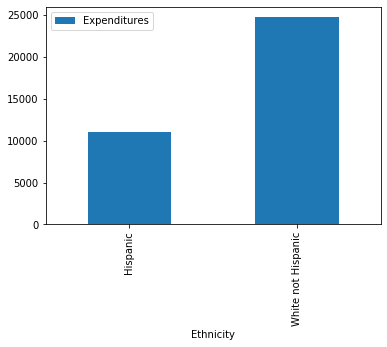

In [3]:
expend_cube = dds_data.pivot_table(index = "Ethnicity", values = "Expenditures", aggfunc = np.mean)
expend_cube.loc[["Hispanic", "White not Hispanic"]].plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026CC3A48E88>],
      dtype=object)

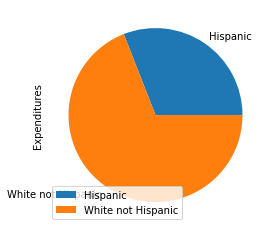

In [4]:
expend_cube.loc[["Hispanic", "White not Hispanic"]].plot.pie(subplots=True)

As we can see from the bar and pie charts,Department of Developmental Services (DDS) spents more money for 'White not Hispanic' than for 'Hispanic'.
<br>
However, let's try to plot a different way as shown below. 

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

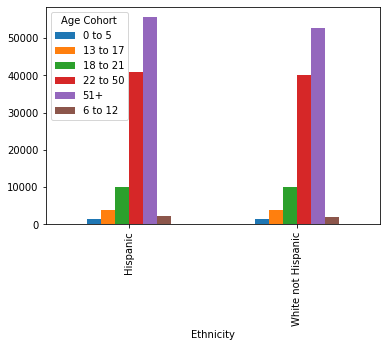

In [5]:
expend_cube = dds_data.pivot_table(index = "Ethnicity", columns = "Age Cohort", values = "Expenditures", aggfunc = np.mean)
expend_cube.loc[["Hispanic", "White not Hispanic"]].plot.bar()

This graph contradicts our assumption of Department of Developmental Services (DDS) spending more money for 'White not Hispanic' than for 'Hispanic'.
<br>
Question 1 graphs are deceiving.<br>
There are some biased in question 1 graphs. <br>
This graph shows that there's no baised on white race.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

<br><br>
Destribution among age groups within White not Hispanic

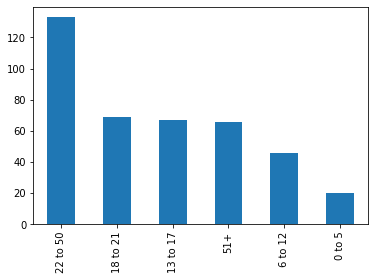

In [6]:
dds_data.loc[dds_data["Ethnicity"] == "White not Hispanic","Age Cohort"].value_counts().plot.bar()

<br><br>
Destribution among age groups within Hispanic

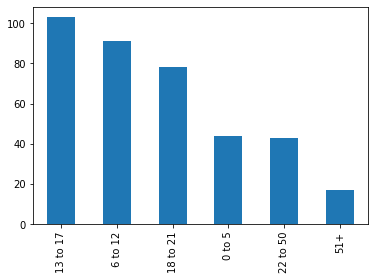

In [7]:
dds_data.loc[dds_data["Ethnicity"] == "Hispanic","Age Cohort"].value_counts().plot.bar()

<br><br>
Average Expenditures for each age group despite race

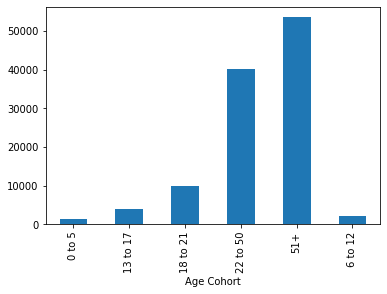

In [8]:
dds_data.groupby("Age Cohort")["Expenditures"].mean().plot.bar()

Expendures spent for 51+ have high volume.<br>
Hispanic has only 17 people in this category and White has approximately 66.<br>
The second highest spent group 22 to 50. <br>
Hispanic has approximately 43 people and White has approximately 133.<br>
They may have the same mean, but the total amounts of money for these categories are different.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the PDF and Notebook (ipynb) iLearn.